## Influences of Different Colonial Policies on the Economic Development of the Colonies

#### ECON323 Final Project

Name: Zoe（ZI Wang）


### Introduction:

As the America is the colony of the United Kingdom, Spain and Portugal, as well as the significant differences in economic level, political system, colonial policies and religious belief between those host countries, this difference resulted in different forms of rule in their respective colonies. For the reason of path dependence, even after the independence of these colonies, this difference still exists.

The Economic Freedom Index is to track over two decades of the advancement in economic freedom, opportunity and prosperity in the communities. Generally speaking, the index covers 12 freedoms, ranged from property rights to financial freedom. The dataset covers 186 countries. Its measurement is based on 12 quantitative and qualitative factors, grouped into four broad categories of economic freedom. Those categories are (1) Rule of law, including property rights, government integrity, judicial effectiveness; (2) Government Size, including government spending, tax burden and fiscal health; (3) Regulatory Efficieny, including bussiness freedom, labor freedom and monetary freedom; (4) Open Markets, including trade freedom, investment freedom and financial freedom. 

This paper uses the world Economic Freedom Index (EFW) to measure the different institutional quality of British and Portuguese colonies. While the GDP per capita for host country, the population density per square kilometers are also be chosen as independent variable and the GDP per capita for colony is selected as the dependent variable. 

After input the statistics above, will do the correlation analysis. First we can draw the plot between the GDP of the colonies and the economic freedom index. If there is a strong relationship between them, then we are going to find the coefficients for the variables by OLS model. Then we can run a hypothesis test as a finish of the project.


### Data

The dataset is publicly available in The Heritage Foundation, https://www.heritage.org/index. Many researchers uses this dataset for studies. In particular, we download the version packed by a kaggle competition. The dataset can be downloaded directly on https://www.kaggle.com/lewisduncan93/the-economic-freedom-index. 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Remark: the new version of plotly has bug in express, so use old version instead
# conda install -c plotly plotly=4.5.0
import plotly
import plotly.express as px
import statsmodels.api as sm 
import pylab as py 
import seaborn as sns
from statsmodels.formula.api import ols

In [5]:
# read and clean data
mydata = pd.read_csv("economic_freedom_index2019_data.csv", encoding="ISO-8859-1")
df = mydata[['Country', '2019 Score', 'Population (Millions)', 'GDP (Billions, PPP)']]
df = df.rename(columns = {'Country':'Country', '2019 Score':'EFW', 
                             'Population (Millions)':'POP', 'GDP (Billions, PPP)':'GDP'})

# remove certain rows, which have NA only
df = df.drop([78, 88, 98, 99, 153, 161, 183])

# fix the GPA column, remove $ from the string, and change it to numeric type only
df.POP = df.POP.astype(float)
df.GDP = df.GDP.replace('[\$,]', '', regex=True).astype(float)

In [6]:
# first 6 observations
df.head()

,Country,EFW,POP,GDP
0,Afghanistan,51.5,35.5,69.6
1,Albania,66.5,2.9,36.0
2,Algeria,46.2,41.5,632.9
3,Angola,50.6,28.2,190.3
4,Argentina,52.2,44.1,920.2


### Descriptive Statistics

In [20]:
df_num = df.drop(['Country'], axis = 1)
df.describe()

,EFW,POP,GDP
count,179.000000,179.000000,179.000000
mean,61.074860,40.758101,705.386592
std,10.506926,147.531120,2447.289209
min,25.900000,0.100000,0.200000
25%,54.000000,2.250000,25.700000
50%,60.800000,8.700000,83.900000
75%,67.800000,29.400000,402.550000
max,90.200000,1390.100000,23159.100000


The descriptive statistics of data results are summarized in the table above. There are 179 observations in the dataset after we remove data with most NA. In this dataset, the mean of economic freedom index is 61.07 with standard deviation 10.51. The range is from 25.9 to 90.2. For population (in millions), the mean is 40.76 and standard deviation is 147.53. The range is from 0.1 to 1390.1. For GDP (in Billions), the mean is 705.39 with standard deviation 2447.29. The range is from 0.2 to 23159.1. The correlation matrix of the variables are given below. 

In [53]:
df.corr()

,EFW,POP,GDP
EFW,1.000000,-0.040149,0.114300
POP,-0.040149,1.000000,0.806675
GDP,0.114300,0.806675,1.000000


Scatterplot matrix of the data

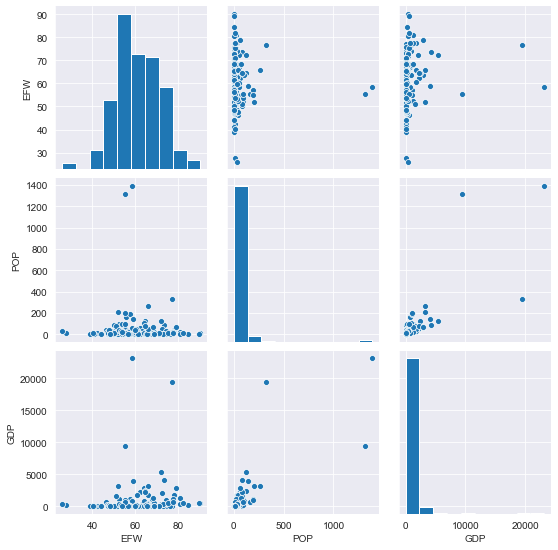

In [55]:
sns.pairplot(df_num)

Interactive plot to show the relationship between GDP and economic freedom index

In [17]:
fig = px.scatter(df, x='GDP', y='EFW', size = 'POP', 
                hover_data = ['Country'])
fig.update_layout(
    title="Interactive Scatterplot of Economic Freedom Index vs GDP",
    xaxis_title="GDP per capita",
    yaxis_title="Economic Freedom Index ",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

The interactive plot shows the relationship between economic freedom index and GDP. The size is scaled with the population. The information about the data point is displayed when the mouse is hover over the point. 

Now, I want to check the assumption for linear regression model. One of the assumptions for original linear regression is that the response variable is normally distributed. So, the normal probability plot and histogram of the dependent variable GDP are plotted and given below. 

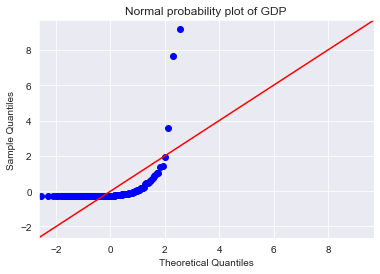

In [40]:
fig = sm.qqplot(df.GDP, line = '45', fit = True)
h = plt.title('Normal probability plot of GDP')
plt.show()

Text(0.5, 1.0, 'Histogram of the GDP')

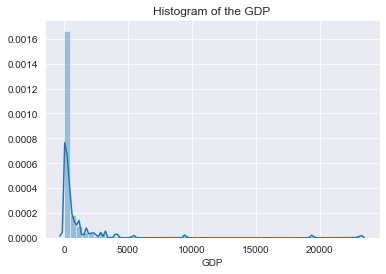

In [46]:
sns.set_style('darkgrid')
sns.distplot(df.GDP).set_title("Histogram of the GDP")

Since GDP is proposed to be used as the dependent variable in regression model, it needs to be normally distributed. According to histogram and normal probability plot, GPD is heavily skewed to right. Therefore, I proposed to log transform GDP before it is served as dependent variable. The normal probability plot and histogram of log(GDP) is given below. 

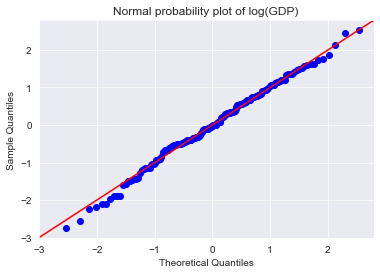

In [48]:
fig = sm.qqplot(np.log(df.GDP), line = '45', fit = True)
h = plt.title('Normal probability plot of log(GDP)')
plt.show()

Text(0.5, 1.0, 'Histogram of the log(GDP)')

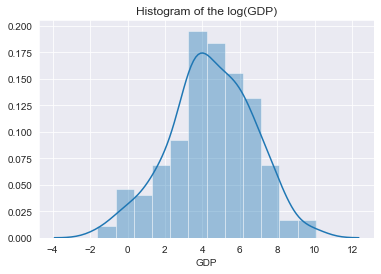

In [49]:
sns.set_style('darkgrid')
sns.distplot(np.log(df.GDP)).set_title("Histogram of the log(GDP)")

It is obvious that the log transformation relief the heavily skewed issue with GPD. Therefore, the dependent variable is log-transformed GDP instead. 

### Analysis

We perform oridinary linear regresion (OLS) to study the relationship between GDP and EFW, control for population. The result is given below. 

In [61]:
# add new column log(GDP)
df['logGDP'] = np.log(df.GDP)
df.head()

,Country,EFW,POP,GDP,logGDP
0,Afghanistan,51.5,35.5,69.6,4.242765
1,Albania,66.5,2.9,36.0,3.583519
2,Algeria,46.2,41.5,632.9,6.450312
3,Angola,50.6,28.2,190.3,5.248602
4,Argentina,52.2,44.1,920.2,6.824591


In [64]:
# fit ordinal linear regression model 
model = ols("logGDP ~ POP + EFW", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logGDP   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     34.97
Date:                Thu, 23 Apr 2020   Prob (F-statistic):           1.63e-13
Time:                        11:37:54   Log-Likelihood:                -366.33
No. Observations:                 179   AIC:                             738.7
Df Residuals:                     176   BIC:                             748.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1186      0.838     -0.142      0.888      -1.773       1.535
POP            0.0065      0.001      6.722      0.000       0.005       0.008
EFW            0.0707      0.013      5.241      0.000       0.044       0.097
==============================================================================
Omnibus:                        5.341   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.442
Skew:                          -0.421   Prob(JB):                       0.0658
Kurtosis:                       2.861   Cond. No.                         912.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted regression model is 

$$\hat{log(GDP)}=-0.1186+0.0065(POP)+0.0707(EFW)$$

Interpretation: 
Contorlling for the economic freedom index, when the population is increased by 1 million, we expect the GDP is increased by 0.65%. Controlling for the population, when the economic freedom index is increased by 1 unit, we expect the GDP is increased by 7.07%. 

### Hypothesis testing for significance 

We want to test whether the coefficients in the model is significant or not. In particular, we are interested whether economic freedom index has linear relationship with the log(GDP). If we specify the model as 

$$ log(GDP_i)=\beta_0+\beta_1(POP_i)+\beta_2(EFW_i)+\epsilon_i $$

We want to test 

$H_0: \beta_2=0$

$H_1: \beta_2\neq 0$

The test statistic is 5.241 with p-value close to 0. Since the p-value is less than 0.05, we reject the null hypothesis at 5% level of significance. We conclude that economic freedom index has linear relationship with log(GDP)

### Conclusion

The ordinary linear regression shows that there is a linear relation between log(GDP) and economic freedom index. The R-square is just 28.4%. it means both population and economic freedom index can only explain 28.4% variation in log(GDP). For the future study, if the goal is to find variables that can explain the variation in GDP or log(GDP), we need to include more predictors since only population and economic freedom index is not enough. 